# `Matplotlib` 資料視覺化

`matplotlib` 幾乎是標準 Python 畫圖套件了! 在有 `matplotlib` 之前, Python 要畫圖不那麼方便, 和 Python 很多套件一樣, 有許多方案, 但各家有不同的優缺點, 也沒有一套是大家都在用的。

而 `matplotlib` 仿 Matlab 式的畫圖方式, 讓很多人很快入手、並且功能相當完整。原作者是 John D. Hunter, 和很多 Python 的套件作者一樣, 他有博士學位。非常令人遺憾的是他在 2012 年因大腸直腸癌治療併發症過逝, 過逝時才 44 歲!


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1 畫個函數

前面說過 `plt.plot` 的基本用法是

    plt.plot(X,Y)

其中 X, Y 是分別是點 x 座標, y 座標形的的 list 或 array。

### 【重點】標準函數畫法

函數畫圖其實就是描點法, 而且再次用到陣列導向計算的概念。

我們先牛刀小試, 畫個 $\sin$ 的圖。

$$f(x) = \sin(x)$$

先來設個 x 的範圍, 就 -10 到 10, 給 100 個點。

In [2]:
x = np.linspace(-10, 10, 100)

y 自然是 $\sin(x)$。

In [3]:
y = np.sin(x)

畫圖!

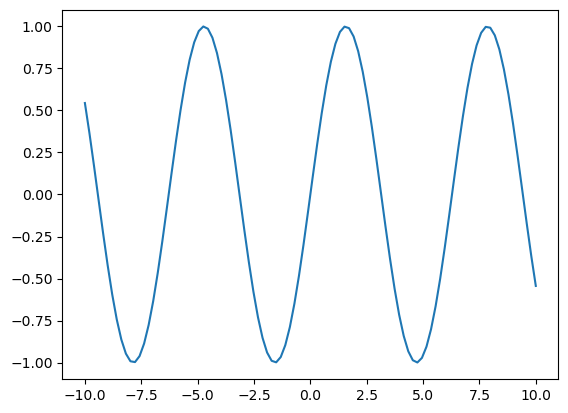

In [4]:
plt.plot(x,y)

### 【練習】函數畫圖

這次我們來畫:

$$f(x) = \frac{\sin(5x)}{1+x^2}$$

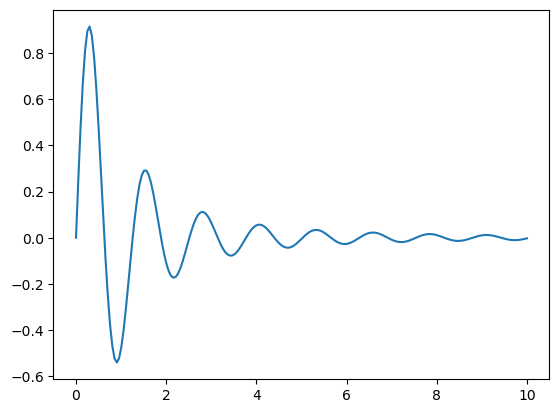

In [5]:
x = np.linspace(0, 10, 200)
y = np.sin(5*x)/(1+x**2)
plt.plot(x,y)

## 2 快速改變風格

雖然 `matplotlib` 在很辛苦的調校之後也是可以畫美美的圖, 不過它比較是「讓我們快速看到結果」的套件。所以它有些快速基本修飾功能。

### 【技巧】快速改變顏色

![快取色彩](images/color.png)

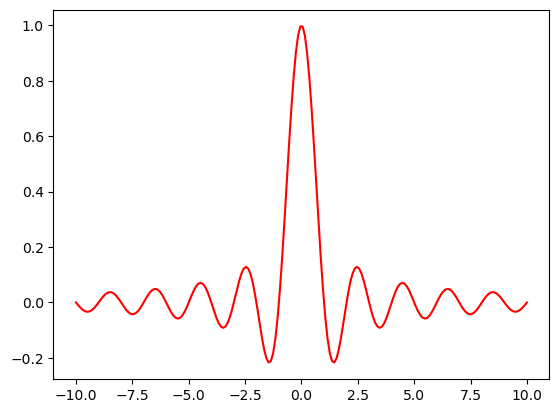

In [6]:
x = np.linspace(-10, 10, 200)
y = np.sinc(x)

plt.plot(x,y,'r')

### 【技巧】快速改變線條風格

快速改變線條風格, 還可和顏色混用。

| 參數 | 說明 |
|---|---|
| `--` | dash |
| `-.` | 點 + dash |
| `:` | 點點 |
| `o` | 大點點 |
| `^` | 三角 |
| `s` | 方塊 |

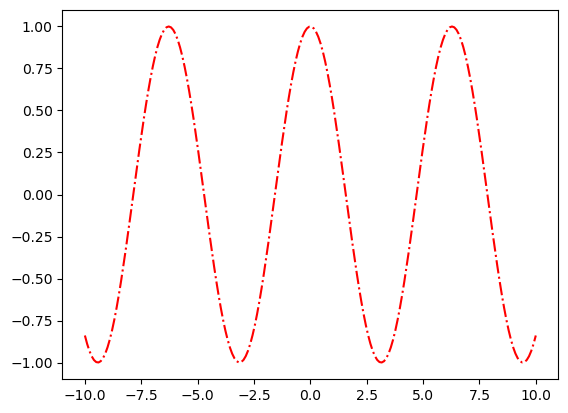

In [7]:
x = np.linspace(-10, 10, 200)
y = np.cos(x)
plt.plot(x,y,'r-.')

## 3 基本的修飾

| 參數 | 說明 |
|---|---|
| `alpha` | 透明度 |
| `color` (`c`)| 顏色 |
| `linestyle` (`ls`) | 線條風格 |
| `linewidth` (`lw`) | 線寬 |

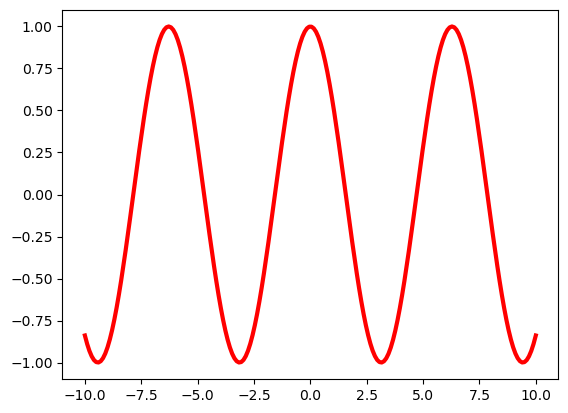

In [8]:
plt.plot(x, y, c='r', lw=3)

## 4 如果畫個參數式圖形

其實參數式圖形基本上也是一堆 x, y 的座標, 只是 x(t), y(t) 都是 t 的函數, 我們可以想成 t 是時間。

假設我們的

$$ -2\pi \leq t \leq 2\pi$$

要畫個半徑是 r 的圓, x(t), y(t) 就是這樣:

* $x(t) = r\cos(t)$
* $y(t) = r\sin(t)$

我們來試試事情是不是如我們想的這樣...

In [9]:
r = 3
t = np.linspace(-2*np.pi, 2*np.pi, 200)

In [10]:
x = r * np.cos(t)
y = r * np.sin(t)

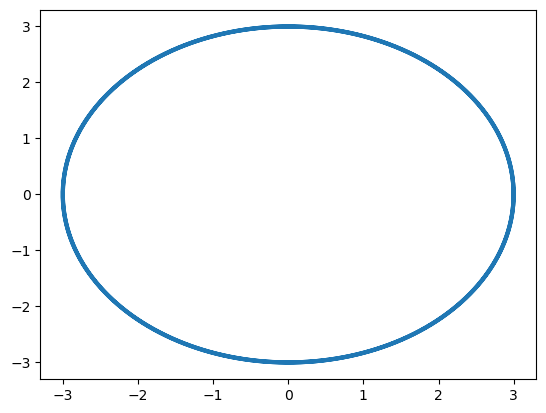

In [11]:
plt.plot(x, y, lw=3)

真的成功了... 等等, `matplotlib` 怎麼畫成橢圓呢? 我們來調整一下。

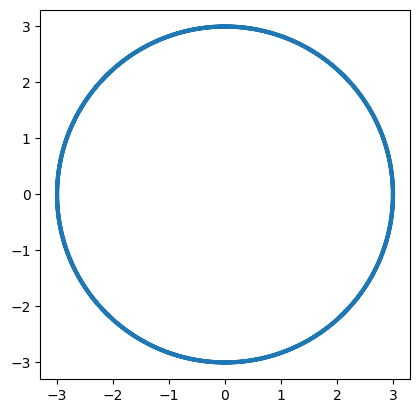

In [12]:
ax = plt.gca()
ax.set_aspect('equal')
plt.plot(x, y, lw=3)

再來我們可以想一下, 如果 r 不是故定的呢? 也就是它會變長變短, 是不是會畫出很多特別的圖呢? 其實很多特別的曲線不過就是找個試合的 r(t), 我們來隨意試試看。

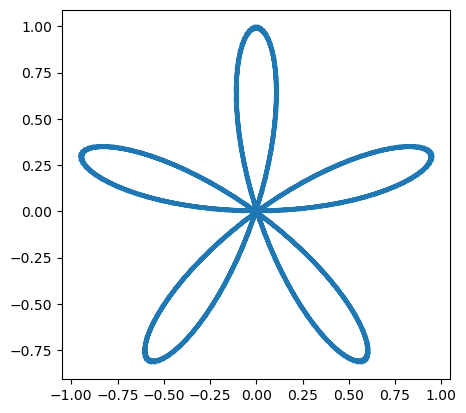

In [13]:
r = np.sin(5*t)
x = r * np.cos(t)
y = r * np.sin(t)

ax = plt.gca()
ax.set_aspect('equal')
plt.plot(x, y, lw=3)

是不是很有意思呢? 你也可以自己試試不同的變化。

## 5 `subplot` 畫多個圖

我們每次畫圖的時候, `matplotlib` 就弄 1 個 figure 畫圖區出來, 裡面可以有很多子圖, 在 figure 裡叫 axes。目前我們都只有 1 個 figure 內含 1 張圖, 所以都不用設, 現在我想畫 4 張圖時。我們就要先想好「陣式」。

比如說 2x2 這樣排列的 4 張圖。

<BarContainer object of 10 artists>

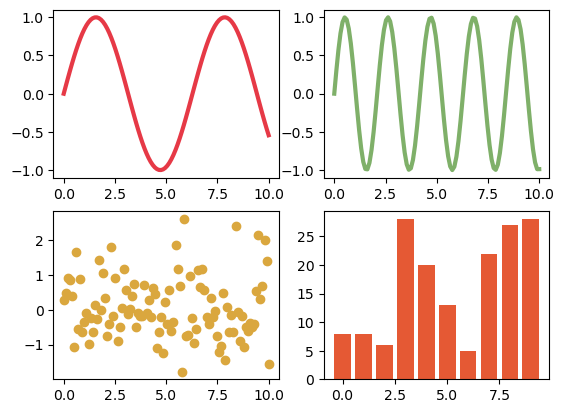

In [14]:
x = np.linspace(0, 10, 100)
plt.subplot(221) # 2x2 第1個
plt.plot(x, np.sin(x), c='#e63946', lw=3)

plt.subplot(222) # 2x2 第2個
plt.plot(x, np.sin(3*x), c='#7fb069', lw=3)

plt.subplot(223) # 2x2 第3個
plt.scatter(x, np.random.randn(100), c='#daa73e')

plt.subplot(224) # 2x2 第4個
plt.bar(range(10), np.random.randint(1,30,10), fc='#e55934')

## 6 進階色彩*

#### 顏色表示法 1

    c = 'r' 

可以用 blue (b), green (g), red (r), cyan (c), magenta (m), yellow (y), black (k), white (w)


#### 顏色表示法 2

用一個 0 到 1 的數字表灰階, 越大越白。

    c = '0.6'
    
#### 顏色表示法 3

網頁常用的標準 16 進位 RGB 表示法。

    c = '#00a676'
    
我們怎知哪裡可選顏色呢? 可以用之前彥良介紹的 [Coolors.co](https://coolors.co) 等。
    
#### 顏色表示法 4

用 0-1 的數字表 RGB 也可以。

    c=(0.7, 0.4, 1)

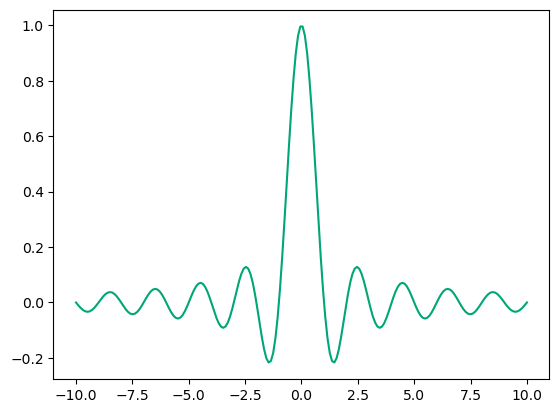

In [15]:

x = np.linspace(-10, 10, 200)
y = np.sinc(x)

plt.plot(x,y,c='#00a676')

## 7 Marker*

所謂 'marker' 就是原來的點, 我們特別標示出來, 為了不要讓圖形太複雜, 我們新換個點比較少的例子。

In [16]:
x = range(20)
y = np.random.randn(20)

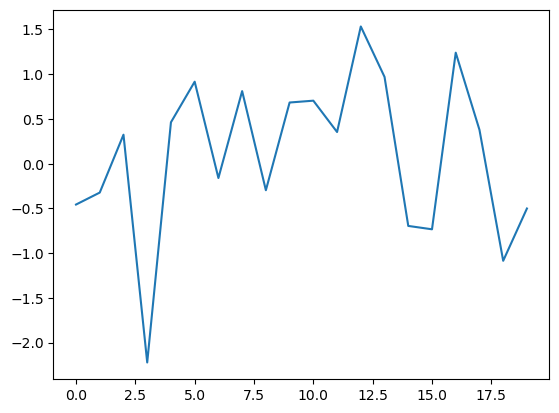

In [17]:
plt.plot(x,y)

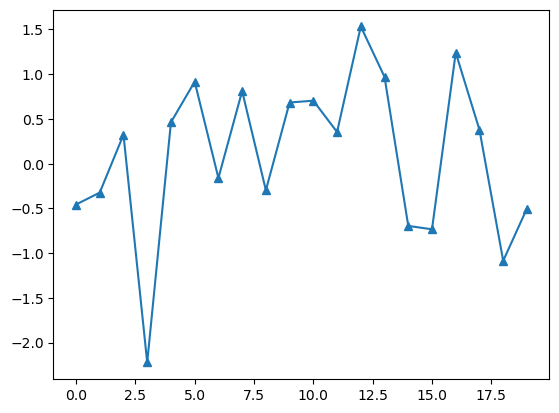

In [18]:
plt.plot(x,y, marker='^')

#### marker 可以設的參數

| 參數 | 說明 |
|---|---|
| `marker` | marker 的風格 |
| `markeredgecolor` (`mec`) | 邊線顏色 |
| `markeredgewidth` (`mew`) | 邊線寬度 |
| `markerfacecolor` (`mfc`) | marker 的顏色 |
| `markerfacecoloralt` (`mfcalt`) | marker 替換色 |
| `markersize` (`ms`) | marker 大小 |
| `markevery` | 隔多少畫一個 marker |

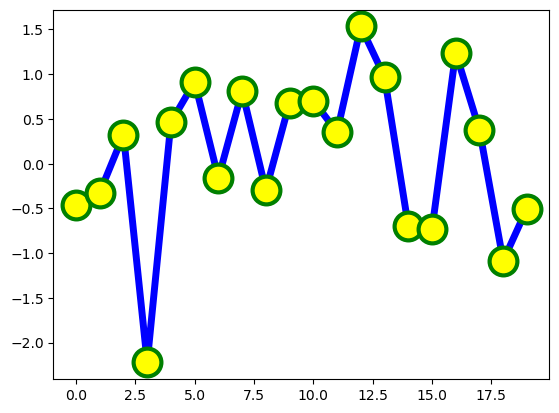

In [19]:
plt.plot(x,y,c='blue', lw=5, marker='o', mfc='yellow', mec='g',mew=3, ms=20)

比較奇特的參數是 `markevery`, 這是說我們每多少筆資料要畫一個 marker。為了示範, 我們拿之前的例子來看看。

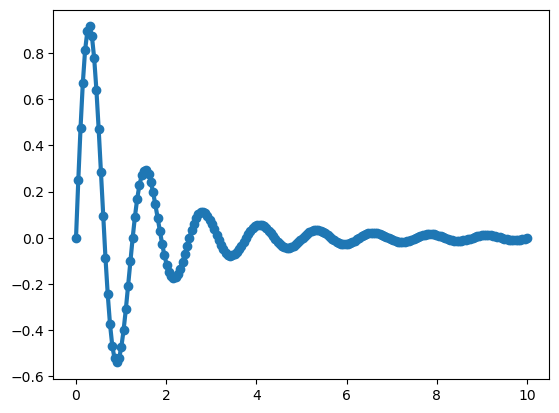

In [20]:
x = np.linspace(0, 10, 200)
y = np.sin(5*x)/(1+x**2)
plt.plot(x,y, lw=3, marker='o')

後面的完完全全連在一起了, 我們現在隔 10 個畫一個 marker 試試。

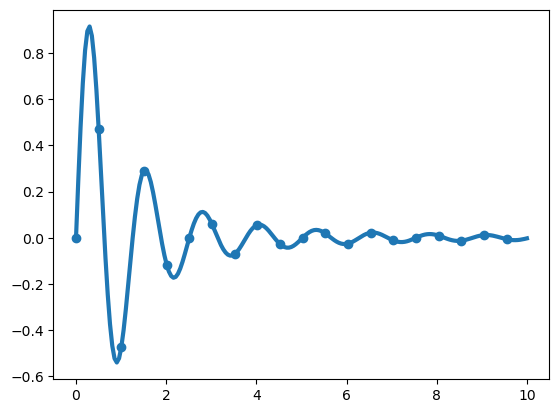

In [21]:
plt.plot(x,y, lw=3, marker='o', markevery=10)

## 8 bar 風*

<BarContainer object of 5 artists>

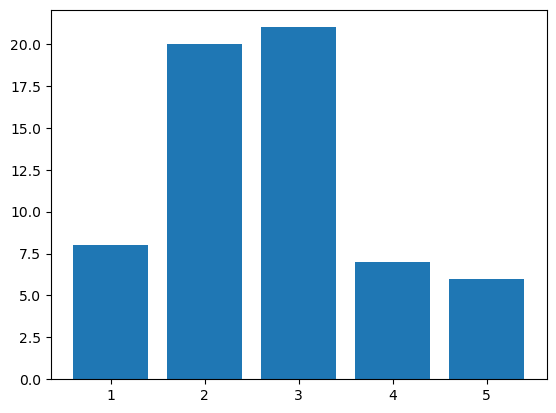

In [22]:
plt.bar(range(1,6), np.random.randint(1,30,5))

移一點點。

<BarContainer object of 5 artists>

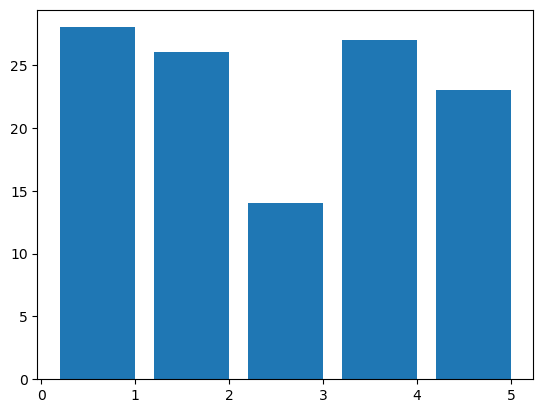

In [23]:
plt.bar(np.arange(0.6,5), np.random.randint(1,30,5))

#### 雙色的長條圖

<BarContainer object of 5 artists>

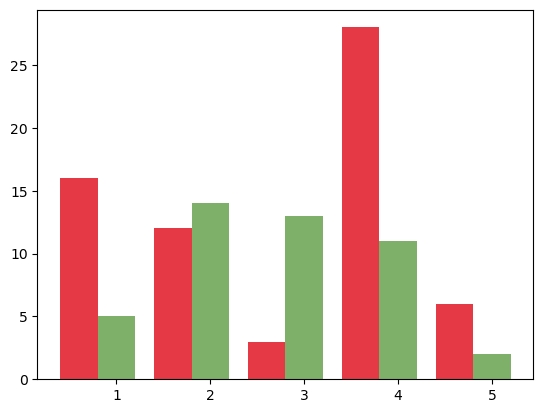

In [24]:
x = np.arange(1,6)
y1 = np.random.randint(1,30,5)
y2 = np.random.randint(1,30,5)
plt.bar(x-0.4, y1, width=0.4, ec='none', fc='#e63946')
plt.bar(x, y2, width=0.4, ec='none', fc='#7fb069')

#### 疊加型的資料

<BarContainer object of 5 artists>

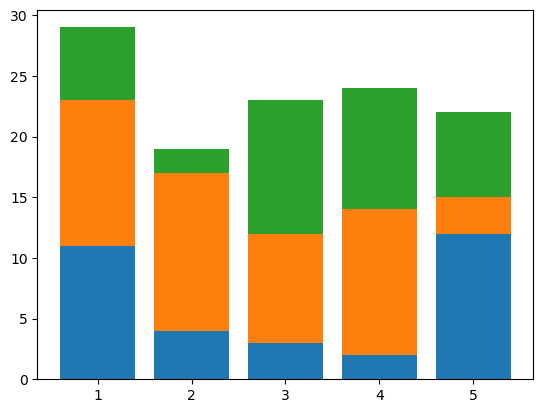

In [25]:
A = np.random.randint(2,15,5)
B = np.random.randint(2,15,5)
C = np.random.randint(2,15,5)

plt.bar(x, A, ec='none')
plt.bar(x, B, ec='none', bottom=A)
plt.bar(x, C, ec='none', bottom=A+B)

#### 橫放的長條圖

<BarContainer object of 5 artists>

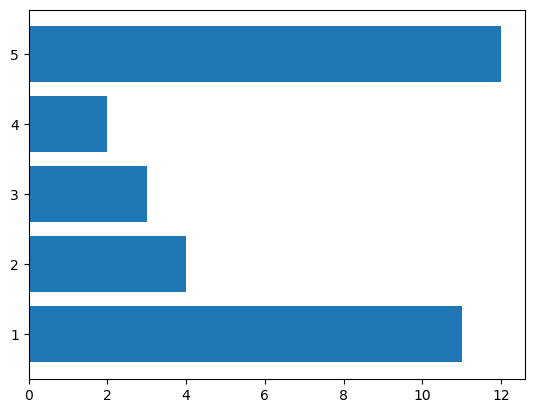

In [26]:
plt.barh(x, A, ec='none')

#### 雙向的長條圖

<BarContainer object of 5 artists>

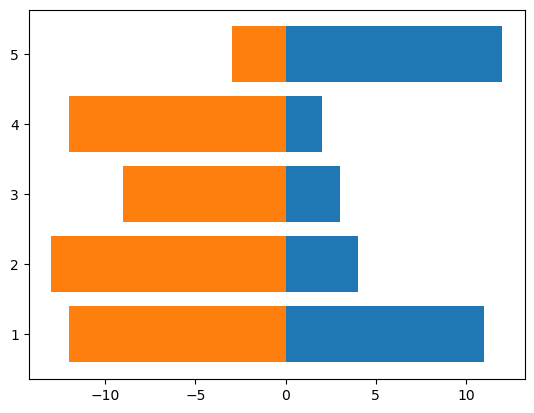

In [27]:
plt.barh(x, A, ec='none')
plt.barh(x, -B, ec='none')

## 9 畫圖區的設定*

#### 說明文字的標示

In [28]:
x = np.linspace(-2*np.pi, 2*np.pi, 200)
y = np.sin(x)

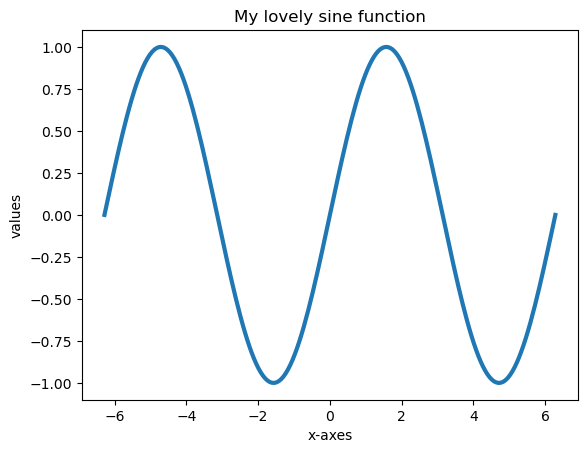

In [29]:
plt.title('My lovely sine function')
plt.xlabel('x-axes')
plt.ylabel('values')
plt.plot(x, y, lw=3)

#### 邊界的設定

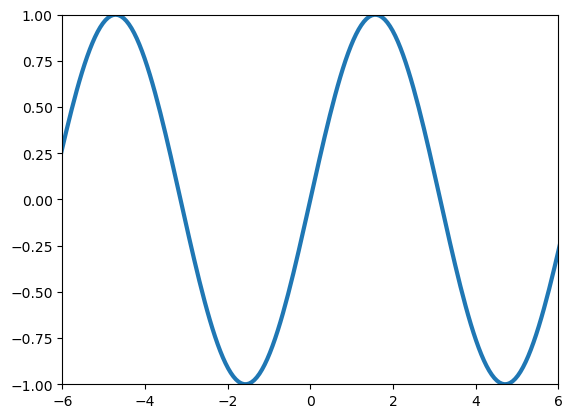

In [30]:
plt.xlim(-6,6)
plt.ylim(-1,1)
plt.plot(x, y, lw=3)

#### xticks

([<matplotlib.axis.XTick at 0x14a500550>,
 [Text(0.0, 0, '$0$'),
  Text(1.5707963267948966, 0, '$\\frac{\\pi}{2}$'),
  Text(3.141592653589793, 0, '$\\pi$'),
  Text(4.71238898038469, 0, '$\\frac{3\\pi}{2}$'),
  Text(6.283185307179586, 0, '$2\\pi$')])

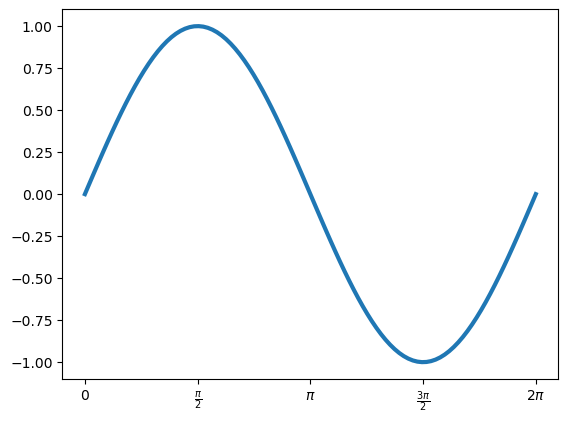

In [31]:
xv = np.linspace(0, 2*np.pi, 100)
yv = np.sin(xv)
plt.plot(xv, yv, lw=3)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           ['$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

# [練習]自己生成測試數據，X軸xticks對應到y軸數值

例如: 1,2,3,4,5 對應X軸 '甲','乙'...

([<matplotlib.axis.XTick at 0x14a625950>,
 [Text(1, 0, 'A'),
  Text(2, 0, 'B'),
  Text(3, 0, 'C'),
  Text(4, 0, 'D'),
  Text(5, 0, 'E')])

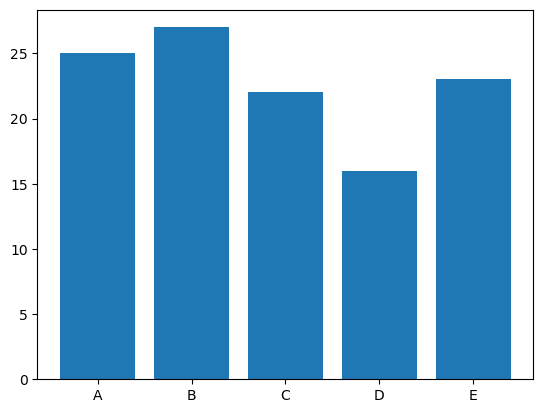

In [32]:
x = np.arange(1,6)
y = np.random.randint(1,30,5)
plt.bar(x, y, ec='none')
plt.xticks(x, ['A', 'B', 'C', 'D', 'E'])

#### 圖例 legend

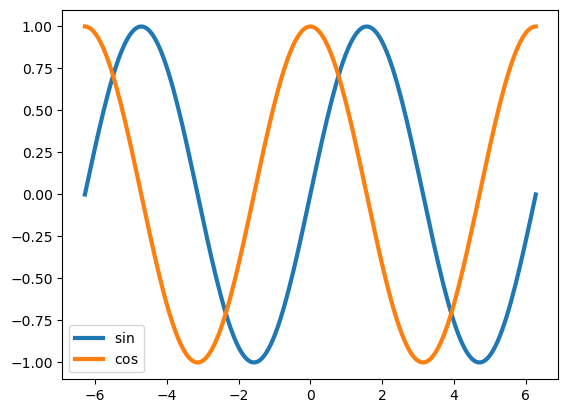

In [33]:
x = np.linspace(-2*np.pi, 2*np.pi, 200)
plt.plot(x, np.sin(x), lw=3, label=r'$\sin$')
plt.plot(x, np.cos(x), lw=3, label=r'$\cos$')
plt.legend()

可用 `loc` 去設圖例的位置, 依 1, 2, 3, ... 表示。

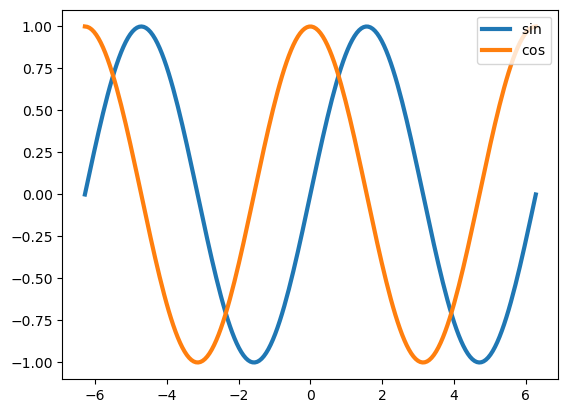

In [34]:
plt.plot(x, np.sin(x), lw=3, label=r'$\sin$')
plt.plot(x, np.cos(x), lw=3, label=r'$\cos$')
plt.legend(loc=1)

## 10 取得現在工作中 axes*

我們有時要設 axes 的背景啦等等的資訊。這時就要取得現在工作中的 axes。這一般有兩種方式, 第一種是設 `subplot` 時可以取得:

    fig, ax = plt.subplot()
    
另一種是用 `gca` 函數:

    ax = plt.gca()

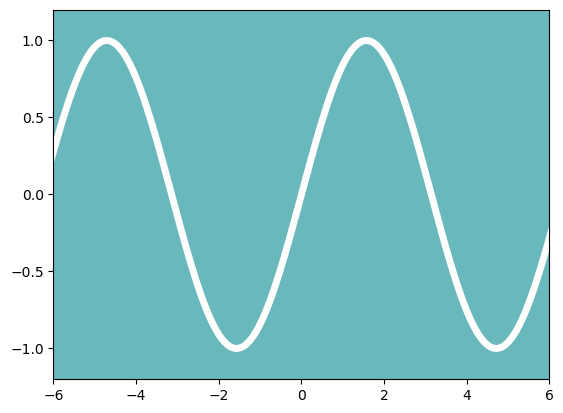

In [35]:
ax = plt.gca()
ax.set_facecolor('#69b8bb')
ax.set_xlim(-6,6)
ax.set_ylim(-1.2,1.2)
plt.plot(x, np.sin(x), lw=5, c='white')

#### 移動 x, y 座標軸

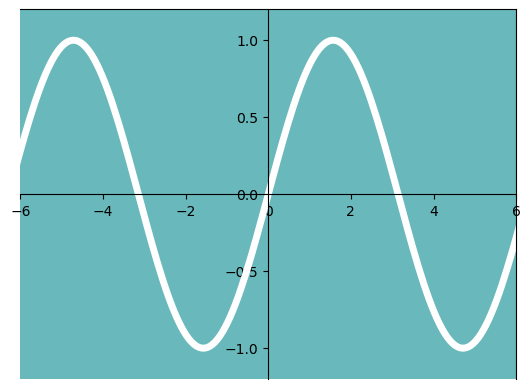

In [36]:
ax = plt.gca()
ax.set_facecolor('#69b8bb')
ax.set_xlim(-6,6)
ax.set_ylim(-1.2,1.2)

ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
plt.plot(x, np.sin(x), lw=5, c='white')

## 11 耍寶可愛的 `xkcd`*

In [37]:
plt.xkcd()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

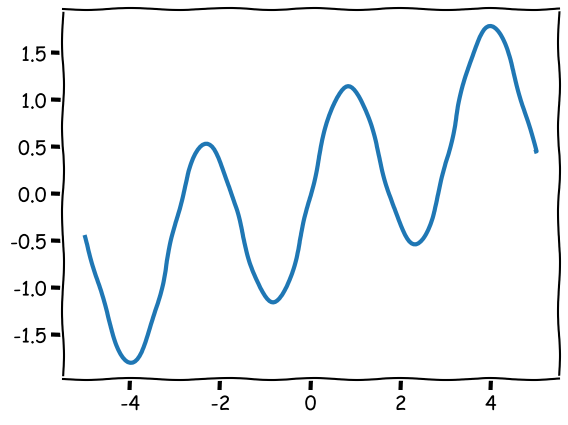

In [38]:
x = np.linspace(-5, 5, 200)
y = np.sin(2*x) + 0.2*x
plt.plot(x, y, lw=3)

## 12 `seaborn` 大救星

雖然 `matplotlib` 幾乎什麼都可以調, 但有些簡單的調整卻要花費很多時間。於是有了許多可以協助 `matplotlib` 變美、變方便的套件出現。最近有個很有名的叫 `seaborn`, 儼然有另一個標準套件的態式。

最重要的是 `seaborn` 和我們未來要介紹的 `pandas` 配合得非常好, 雖然熊貓和海生的聽來就沒什麼關係...

我們先來個標準 (又來標準縮寫) 讀入 `seaborn` 的方法。

In [39]:
plt.rcdefaults()

import seaborn as sns

然後像平常畫個圖。

In [40]:
sns.set(color_codes=True)

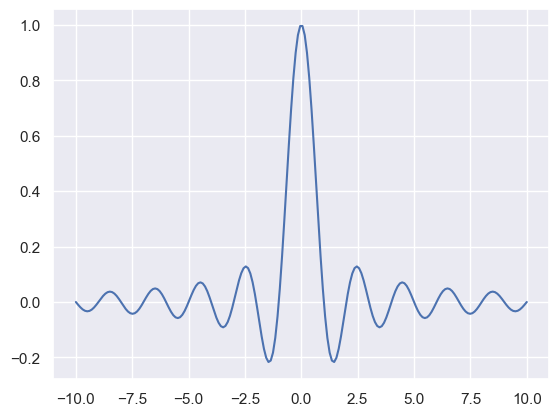

In [42]:
x = np.linspace(-10, 10, 200)
y = np.sinc(x)

plt.plot(x, y)

傑克, 這真是太神奇了!

總之, 你根本就直接用原來 `matplotlib` 的指令, 馬上 `seaborn` 就會幫你美化。當然我們還是可以做更多的控制, 詳情請參考

[seaborn 的網站](https://seaborn.github.io/)